### Homework 1

Due 10/1 Midnight

100 pts

Work must be submitted as a jupyter notebook with a code or markdown section corresponding to the numbers (1-15) below.

This must be solely your work.

The title of the notebook must be: rcsid_Homework1 (Note: your rcsid is 6 characters not your RIN)

This homework is intended to give you experience with real-world datasets and applying the KNN classification and Linear Regression Algorithms. You must to a KNN classification model and a Linear Regression model. You choose the datasets (one for each model).

#### Find and download the datasets. 

The datasets should have three or more variables with at least one categorical variable. 
The datasets should be on a topic that interests you although this is not strictly a requirement.  
Your submission must contain:  
1. A link to the datasets  (1)
2. A statement about the goal of the models. What do you want to predict or explain? (2) 
3. A brief description of the variables. For each model: What is the dependent variables? What are the independent variables?(1)
4. Code to read in the datasets and display the beginning and ending observations (1)

Total 5 pts. (1 pt each)

#### Data Preprocessing

For each model your submission must contain:

5. Code to check for missing values and process them as needed. (3)

6. Code for some descriptive statistics, plots of variables of interest and correlations of variables. Including  brief statement of your interpretation of the statistics and the plots. For example, you may notice a non-linear relationship. (12)

8. Code to encode the qualitative variables (3)

9. Code to split the dataset into training and test sets (3)

10. Code to scale the variables  or statement why no need to scale (3)

Total 24 pts 

#### Applying the algorithms

Your submission must contain:

11. Code to create the models and fit to training data. ( 3 pts each))

12. Code to predict to test set (3 pts each)

Total 12 pts. 

#### Results

Your submission must contain:

For the KNN model:

13. Code to display the confusion matrix for the test and the training data (5)

14. Code to calculate the accuracy of the test data. and code to calculate the error rate for the training data.(4)

For the Linear Regression. (3)

13. Code to display the intercept and coefficients(3)

14. Code to display the RMSE.(3)
    
15. Code displaying the R-squared value for your Linear Regression with brief statement interpreting the R-squared value.(3)


Total 9 points (9)

Total 100 pts (50 pts for each model)

## Answer 
### Linear Regression

1. Link to the datasets:
https://www.kaggle.com/spscientist/students-performance-in-exams
<br>(Direct download: http://homepages.rpi.edu/~zhangz22/programming_for_cog_sci_and_ai/StudentsPerformance.csv
<br>This data set consists of the marks secured by the students in various subjects.

2. A statement about the goal of the models. What do you want to predict or explain? (2)
<br>
This model can help understand the influence of parents' level of education and test preparation on students' performance.
<br>
3. A brief description of the variables. For each model: What is the dependent variables? What are the independent variables?
<br>
The data set contains 5 variables:  <br>
Dependent variables: <br>
-- parental level of education <br>
-- test preparation course <br>
Independent variables: <br>
-- math score <br>
-- reading score <br>
-- writing score <br>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
''' 4. Code to read in the datasets and display the beginning and ending observations '''
sp = pd.read_csv("StudentsPerformance.csv")
sp.drop(columns = ["gender", "race/ethnicity", "lunch"], inplace = True)
sp.rename(columns ={'math score' : 'math_score'}, inplace =True)
sp.rename(columns ={'reading score' : 'reading_score'}, inplace =True)
sp.rename(columns ={'writing score' : 'writing_score'}, inplace =True)
sp.rename(columns ={'test preparation course': 'test_preparation'}, inplace =True)
sp.rename(columns ={'parental level of education': 'parent_level_of_education'}, inplace =True)
sp.head()

,parent_level_of_education,test_preparation,math_score,reading_score,writing_score
0,bachelor's degree,none,72,72,74
1,some college,completed,69,90,88
2,master's degree,none,90,95,93
3,associate's degree,none,47,57,44
4,some college,none,76,78,75


In [3]:
sp.tail()

,parent_level_of_education,test_preparation,math_score,reading_score,writing_score
995,master's degree,completed,88,99,95
996,high school,none,62,55,55
997,high school,completed,59,71,65
998,some college,completed,68,78,77
999,some college,none,77,86,86


**Data Preprocessing**

In [4]:
''' 5. Code to check for missing values '''
sp.isnull().sum()

parent_level_of_education    0
test_preparation             0
math_score                   0
reading_score                0
writing_score                0
dtype: int64

In [66]:
''' Code to process them as needed '''
sp = sp.dropna()
sp.isnull().sum()

parent_level_of_education    0
test_preparation             0
math_score                   0
reading_score                0
writing_score                0
dtype: int64

In [67]:
'''
6. Code for some descriptive statistics, plots of variables of interest and correlations of variables.
   Including brief statement of your interpretation of the statistics and the plots. 
   For example, you may notice a non-linear relationship.
'''
sp.describe()  

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


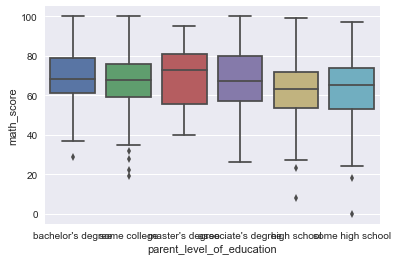

In [68]:
sns.boxplot(x='parent_level_of_education',y = 'math_score', data = sp);

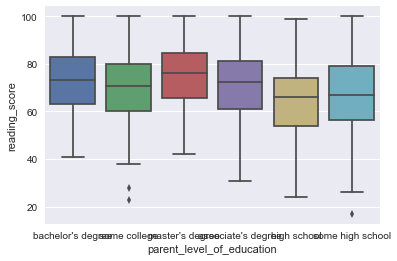

In [69]:
sns.boxplot(x='parent_level_of_education',y = 'reading_score', data = sp);

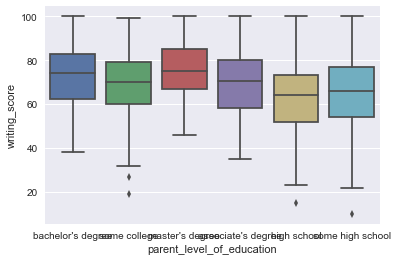

In [70]:
sns.boxplot(x='parent_level_of_education',y = 'writing_score', data = sp);

The three diagrams above shows the relation between student parents' education level and students' performance. With higher student parent's education level, the higher the students' performance are.

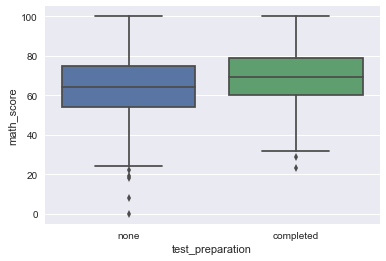

In [71]:
sns.boxplot(x='test_preparation',y = 'math_score', data = sp);

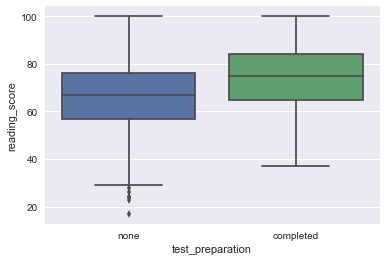

In [72]:
sns.boxplot(x='test_preparation',y = 'reading_score', data = sp);

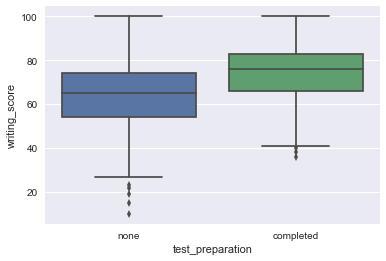

In [73]:
sns.boxplot(x='test_preparation',y = 'writing_score', data = sp);

The three diagrams above shows the relation between students' test preparation and students' performance. It is very obvious that students who completed the test preparation had much better performance.

In [74]:
''' 7. Code to encode the qualitative variables (3) '''
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sp.loc[:, 'test_preparation'] = label_encoder.fit_transform(sp.loc[:, 'test_preparation'])
print(sp.test_preparation.values)

[1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 

In [75]:
sp.loc[:, 'parent_level_of_education'] = label_encoder.fit_transform(sp.loc[:, 'parent_level_of_education'])
print(sp.parent_level_of_education.values)

[1 4 3 0 4 0 4 4 2 2 0 0 2 4 3 5 2 5 3 0 2 4 4 5 1 3 4 1 2 3 4 4 3 4 4 0 0
 5 0 0 0 0 0 4 0 0 0 2 0 2 4 0 4 2 5 2 0 0 4 5 1 5 0 0 5 5 5 4 0 0 4 4 0 5
 5 0 5 1 5 3 0 2 4 0 2 4 4 0 4 5 1 2 2 0 4 0 5 4 4 1 4 1 0 2 4 4 3 0 0 5 0
 2 0 4 1 2 1 1 5 4 1 0 4 2 4 2 5 4 3 1 3 5 4 4 1 1 5 2 0 4 5 4 4 2 4 4 5 0
 1 0 5 1 0 1 5 4 2 4 0 0 0 4 3 2 3 1 2 3 2 4 2 5 4 0 1 3 2 0 3 5 3 4 2 0 5
 0 2 5 5 1 0 4 5 4 3 0 5 2 4 1 0 4 0 0 4 5 1 2 4 4 5 4 2 0 2 5 0 2 2 5 2 0
 5 5 0 3 4 2 5 4 4 0 1 5 1 0 1 5 4 0 2 1 2 4 5 0 0 2 2 2 5 4 5 3 2 4 0 0 4
 3 5 4 5 2 2 5 1 2 0 4 1 4 0 4 4 1 5 2 5 1 2 2 1 4 5 0 0 5 1 5 0 5 5 1 2 0
 5 0 2 0 4 5 0 0 0 4 4 5 0 2 0 1 1 0 1 2 3 0 1 0 2 2 4 5 2 4 4 4 0 5 2 0 0
 0 1 4 5 0 5 5 2 2 2 0 4 2 4 1 2 0 1 4 4 0 4 1 0 4 4 4 2 5 4 5 4 1 2 1 5 5
 4 4 5 4 1 0 5 3 5 1 0 0 3 5 5 4 1 0 2 3 5 4 4 0 5 2 2 0 5 5 5 4 4 2 2 5 0
 0 2 0 3 4 0 5 1 2 1 0 4 2 0 2 3 5 4 4 1 5 5 5 0 2 2 5 5 4 0 0 2 5 4 2 5 0
 5 5 4 2 2 0 4 4 0 4 0 1 1 0 1 2 1 4 4 4 1 4 0 2 2 4 0 2 0 5 0 1 1 0 3 0 2
 0 4 2 0 2 4 0 5 0 0 0 4 

In [76]:
''' 8. Code to split the dataset into training and test sets (3) '''
from sklearn.model_selection import train_test_split
X = sp.iloc[:,0:2]
y = sp.iloc[:,2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
sp_data = X_train, X_test, y_train, y_test
print("X Train\n ",X_train.head())
print("y Train\n ",y_train.head())

X Train
       parent_level_of_education  test_preparation
281                          2                 1
42                           0                 1
255                          4                 1
906                          2                 1
394                          5                 0
y Train
       math_score  reading_score  writing_score
281          45             48             46
42           53             58             65
255          62             73             70
906          57             48             51
394          65             74             77


In [77]:
''' 9. Code to scale the variables or statement why no need to scale (3) '''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
X_train, X_test, y_train, y_test = sp_data

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
print("X Train\n ",X_train)

X Train
  [[-0.23429981  0.75203572]
 [-1.3209076   0.75203572]
 [ 0.85230799  0.75203572]
 ...
 [-0.23429981 -1.32972407]
 [-0.23429981  0.75203572]
 [ 1.39561189 -1.32972407]]


In [78]:
X_train, X_test, y_train, y_test = sp_data
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)
print("X Train\n ",X_train)

X Train
  [[0.4 1. ]
 [0.  1. ]
 [0.8 1. ]
 ...
 [0.4 0. ]
 [0.4 1. ]
 [1.  0. ]]


** Applying the algorithms **

In [80]:
''' 11. Code to create the models and fit to training data. ( 3 pts each)) '''
X.shape,y.shape, X_test.shape, X_train.shape, y_test.shape, y_train.shape

((1000, 2), (1000, 3), (200, 2), (800, 2), (200, 3), (800, 3))

In [81]:
''' 12. Code to predict to test set (3 pts each) '''
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

** Results **

In [82]:
''' 13. Code to display the intercept and coefficients(3) '''
print(f'Intercept: {model.intercept_} \n Slope: {model.coef_} ')

Intercept: [71.29612803 75.64914584 76.59109246] 
 Slope: [[-3.60560029 -5.51531099]
 [-3.8581388  -7.45499155]
 [-4.78053015 -9.93003471]] 


In [83]:
''' 14. Code to display the RMSE.(3) '''
X_test.shape

yhat = model.predict(X_test)

In [84]:
''' 15. Code displaying the R-squared value for your Linear Regression with 
brief statement interpreting the R-squared value.(3) '''
def rmse(y,yhat):
    return np.sqrt(np.mean((y - yhat)**2))

rmse(y_test, yhat)

math_score       14.844908
reading_score    13.851133
writing_score    14.012068
dtype: float64

** Brief Statement ** <br>
This means that for each subject, the prediction is about 14 points different from the actual score

### KNN

1. A link to the datasets  <br>
https://www.kaggle.com/fernandol/countries-of-the-world
(Direct download: http://homepages.rpi.edu/~zhangz22/programming_for_cog_sci_and_ai/countries%20of%20the%20world.csv) <br>
The data contains the information on population, region, area size, infant mortality and so on of all countries of the world. All these data sets are made up of data from the US government. 

2. A statement about the goal of the models. What do you want to predict or explain?  <br>
This model will try to use the information such as population, GDP or other variables to predict what region of the world a country is in. Countries are usually similar to their neighbor countries and therefore KNN algorithm can be applied.

3. A brief description of the variables. For each model: What is the dependent variables? What are the independent variables? <br>
- Dependent variables:
Country: Name of the country <br>
Region: What region the country is in <br>
<br>
- Independent variables:
Population: the number of population <br>
Area (sq. mi.): the size of area <br>
Pop. Density (per sq. mi.): the population density <br>
Coastline (coast/area ratio): the ratio of coast/total area <br>
Net migration: the net migration <br>
Infant mortality (per 1000 births): the infant mortality per 1000 births <br>
GDP ($ per capita): the GDP of the country <br>
Literacy (%): the literacy <br>
Phones (per 1000): number of phones per 1000 people <br>
Arable (%): the percent of arable <br>
Crops (%): the percent of crops <br>
Other (%): the percent of others <br>
Climate: the climate of the country <br>
Birthrate: the number of birthrate <br>
Deathrate: the number of deathrate <br>
Agriculture: the number of agriculture <br>
Industry: the number of industry <br>
Service: the number of service <br>

In [85]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
''' 4. Code to read in the datasets and display the beginning and ending observations (1) '''
df = pd.read_csv("countries of the world.csv", thousands=',')
# The name has nothing to do with the prediction
df.drop(columns = ["Country"], inplace = True) 
# Dependent variables:
df.rename(columns ={'Region' : 'region'}, inplace =True)
# Independent variables:
df.rename(columns ={'Population': 'population',
                    'Area (sq. mi.)' : 'area',
                    'Pop. Density (per sq. mi.)' : 'pop_density',
                    'Coastline (coast/area ratio)' : 'coastline',
                    'Net migration' : 'net_migration',
                    'Infant mortality (per 1000 births)' : 'infant_mortality',
                    'GDP ($ per capita)' : 'gdp',
                    'Literacy (%)' : 'literacy',
                    'Phones (per 1000)' : 'phones',
                    'Arable (%)': 'arable',
                    'Crops (%)': 'crops',
                    'Other (%)': 'other',
                    'Climate': 'climate',
                    'Birthrate': 'birthrate',
                    'Deathrate': 'deathrate',
                    'Agriculture' : 'agriculture',
                    'Industry' : 'industry',
                    'Service' : 'service'}, inplace =True)
df.head()

,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,ASIA (EX. NEAR EAST),31056997,647500,480,0,2306.0,16307.0,700.0,360.0,32.0,1213.0,22.0,8765.0,1.0,466.0,2034.0,38.0,24.0,38.0
1,EASTERN EUROPE,3581655,28748,1246,126,-493.0,2152.0,4500.0,865.0,712.0,2109.0,442.0,7449.0,3.0,1511.0,522.0,232.0,188.0,579.0
2,NORTHERN AFRICA,32930091,2381740,138,4,-39.0,31.0,6000.0,700.0,781.0,322.0,25.0,9653.0,1.0,1714.0,461.0,101.0,6.0,298.0
3,OCEANIA,57794,199,2904,5829,-2071.0,927.0,8000.0,970.0,2595.0,10.0,15.0,75.0,2.0,2246.0,327.0,NaN,NaN,NaN
4,WESTERN EUROPE,71201,468,1521,0,66.0,405.0,19000.0,1000.0,4972.0,222.0,0.0,9778.0,3.0,871.0,625.0,NaN,NaN,NaN


In [87]:
df.tail()

,region,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
222,NEAR EAST,2460492,5860,4199,0,298.0,1962.0,800.0,NaN,1452.0,169.0,1897.0,6413.0,3.0,3167.0,392.0,9.0,28.0,63.0
223,NORTHERN AFRICA,273008,266000,10,42,NaN,NaN,NaN,NaN,NaN,2.0,0.0,9998.0,1.0,NaN,NaN,NaN,NaN,4.0
224,NEAR EAST,21456188,527970,406,36,0.0,615.0,800.0,502.0,372.0,278.0,24.0,9698.0,1.0,4289.0,83.0,135.0,472.0,393.0
225,SUB-SAHARAN AFRICA,11502010,752614,153,0,0.0,8829.0,800.0,806.0,82.0,708.0,3.0,929.0,2.0,41.0,1993.0,22.0,29.0,489.0
226,SUB-SAHARAN AFRICA,12236805,390580,313,0,0.0,6769.0,1900.0,907.0,268.0,832.0,34.0,9134.0,2.0,2801.0,2184.0,179.0,243.0,579.0


** Data Preprocessing **

In [88]:
''' 5. Code to check for missing values '''
df.isnull().sum()

region               0
population           0
area                 0
pop_density          0
coastline            0
net_migration        3
infant_mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
other                2
climate             22
birthrate            3
deathrate            4
agriculture         15
industry            16
service             15
dtype: int64

In [89]:
''' Code to process them as needed '''
df = df.dropna()
df.isnull().sum()

region              0
population          0
area                0
pop_density         0
coastline           0
net_migration       0
infant_mortality    0
gdp                 0
literacy            0
phones              0
arable              0
crops               0
other               0
climate             0
birthrate           0
deathrate           0
agriculture         0
industry            0
service             0
dtype: int64

In [90]:
'''
6. Code for some descriptive statistics, plots of variables of interest and correlations of variables.
   Including brief statement of your interpretation of the statistics and the plots. 
   For example, you may notice a non-linear relationship.
'''
df.describe()  

,population,area,pop_density,coastline,net_migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,2948.050279,1649.519553,-5.972067,3461.083799,9125.698324,819.441341,2081.519553,1204.960894,415.424581,7161.648045,3.089385,2119.860335,857.972067,113.865922,222.513966,417.346369
std,1.317639e+08,1.395657e+06,13793.525570,7397.760059,463.095246,3513.033899,9644.123141,198.375370,2101.218754,1299.800518,799.382043,2970.707197,3.975041,1254.307678,520.899788,131.016655,173.189133,264.132803
min,1.347700e+04,2.800000e+01,18.000000,0.000000,-2099.000000,31.000000,500.000000,176.000000,2.000000,0.000000,0.000000,70.000000,1.000000,10.000000,22.000000,0.000000,1.000000,5.000000
25%,1.188580e+06,1.991500e+04,268.000000,9.000000,-79.000000,741.500000,1800.000000,699.500000,271.000000,245.000000,14.000000,6196.500000,2.000000,1194.000000,535.000000,18.000000,40.000000,78.000000
50%,6.940432e+06,1.184800e+05,669.000000,63.000000,0.000000,2055.000000,5100.000000,909.000000,1371.000000,719.000000,96.000000,8223.000000,2.000000,1828.000000,722.000000,62.000000,229.000000,489.000000
75%,2.086014e+07,4.964410e+05,1647.000000,535.500000,27.000000,5533.500000,12950.000000,978.000000,3350.000000,1770.500000,438.500000,9358.500000,3.000000,3020.000000,1046.500000,172.000000,313.500000,618.500000
max,1.313974e+09,9.631420e+06,161830.000000,87066.000000,2306.000000,16307.000000,37800.000000,1000.000000,8980.000000,6211.000000,4896.000000,9996.000000,25.000000,5073.000000,2974.000000,769.000000,906.000000,954.000000


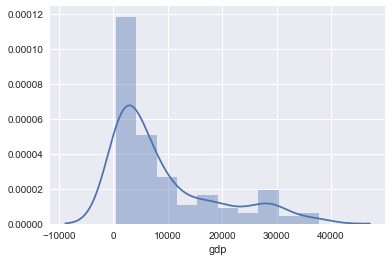

In [91]:
sns.distplot(df.gdp);  
# This graph shows the general gdp of all countries in the world,
# showing the distribution of poor and rich countries

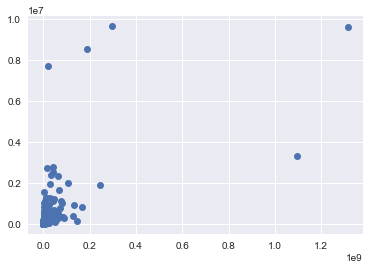

In [92]:
plt.plot(df.population,df.area,'o');
# This graph indicates that the population and the area are not linear related

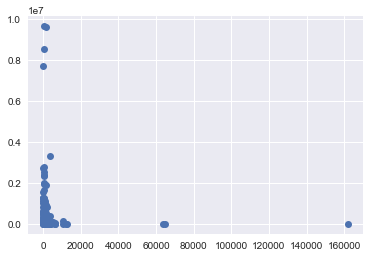

In [93]:
plt.plot(df.pop_density,df.area,'o');
# This graph indicates that the population density and the area are not linear related

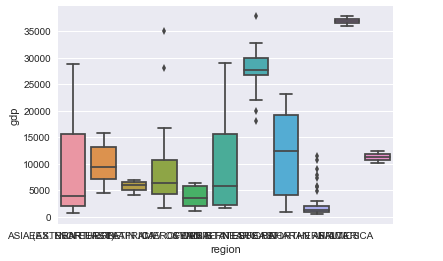

In [94]:
sns.boxplot(x='region',y = 'gdp', data = df);
# This graph shows the distribution of rich and poor countries in different region of the world, showing 
# that the distribution is uneven.

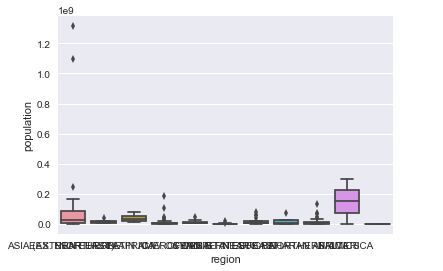

In [95]:
sns.boxplot(x='region',y = 'population', data = df);
# This graph shows that in different region of the world, the population of different countries are different.

In [96]:
''' 7. Code to encode the qualitative variables (3) '''
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.loc[:, 'region'] = label_encoder.fit_transform(df.loc[:, 'region'])
print(df.region.values)

[ 0  3  6  4  4  4  2  4  8 10  2  4  5  0  4  2 10  4  9  7  0  4  9  4
  4  0  3  9  0  9  0  9  9  4  9  9  4  0  4  9  9  9  4  9  4  3 10  9
  4  4  4  6  4  9  9  1  9  8 10 10  4  8  9  9  2 10  9 10  4  4  4  9
  9  4  4  4  0  3 10  0  0  0  5 10  5  4  0  5  2  9  0  0  5  2  0  1
  9  9 10  0  9  9  0  0  9  8  4  9  9  4  8  0  9  9 10  4  8  8  4  9
  9 10  5  0  8  4  8  4  4  0  3 10  4  5  9  3  9  4  4  4  8  9  5  9
  9  9  0  9  9 10  0  9  4  9 10 10  5  0  2  0  9  8  4  6  5  2  9  2
  5 10  7  4  2  8  4  0  5  9  9]


In [97]:
''' 8. Code to split the dataset into training and test sets (3) '''
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
df_data = X_train, X_test, y_train, y_test
print("X Train\n ",X_train.head())
print("y Train\n ",y_train.head())

X Train
       population     area  pop_density  coastline  net_migration  \
130       60422    11854           51        312         -604.0   
76     82422299   357021         2309         67          218.0   
68      5231372   338145          155         37           95.0   
31     13902972   274200          507          0            0.0   
106    15233244  2717300           56          0         -335.0   

     infant_mortality      gdp  literacy  phones  arable   crops   other  \
130            2945.0   1600.0     937.0   912.0  1667.0  3889.0  4444.0   
76              416.0  27600.0     990.0  6679.0  3385.0    59.0  6556.0   
68              357.0  27400.0    1000.0  4053.0   719.0     3.0  9278.0   
31             9757.0   1100.0     266.0    70.0  1443.0    19.0  8538.0   
106            2921.0   6300.0     984.0  1641.0   798.0     5.0  9197.0   

     climate  birthrate  deathrate  agriculture  industry  service  
130      2.0     3305.0      478.0        317.0     149.0    

In [98]:
''' 9. Code to scale the variables or statement why no need to scale (3) '''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
X_train, X_test, y_train, y_test = df_data

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
print("X Train\n ",X_train)

X Train
  [[-0.26579272 -0.38183228 -0.21811088 ...  1.51335312 -0.38388084
   0.43919669]
 [ 0.44218787 -0.15348616 -0.07097078 ... -0.79046704  0.47049281
   1.03284581]
 [-0.22134336 -0.16597363 -0.21133384 ... -0.64834826  0.46468075
   0.96278784]
 ...
 [-0.26166934 -0.37111711 -0.20885761 ... -0.83534665  4.01585288
  -1.30119078]
 [ 0.10841251  0.36377452 -0.19647647 ...  0.07720549  0.73784783
   0.43550943]
 [-0.2621299  -0.37445861 -0.20761949 ...  0.48112201  0.05783615
   0.66780691]]


In [99]:
print("Y Train\n ",y_train)

Y Train
  130     8
76     10
68     10
31      9
106     2
111     5
37      9
122     0
133     9
201     0
165     4
14      4
71      8
215     4
164    10
20      4
210     9
98     10
196    10
40      9
23      0
168     3
128     9
205     6
48      4
77      9
197     5
156     0
41      4
125     9
       ..
176     8
22      7
2       6
6       4
204     4
90      4
161     4
175     4
39      9
42      0
91      0
59      4
160     4
95      0
82      4
142     9
152     9
150     4
30      3
157     8
199     2
34      0
195    10
27      4
180     9
193     4
148     8
62      9
43      4
55      9
Name: region, Length: 143, dtype: int32


In [100]:
X_train, X_test, y_train, y_test = df_data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X Train\n ",X_train)

X Train
  [[-0.26579272 -0.38183228 -0.21811088 ...  1.51335312 -0.38388084
   0.43919669]
 [ 0.44218787 -0.15348616 -0.07097078 ... -0.79046704  0.47049281
   1.03284581]
 [-0.22134336 -0.16597363 -0.21133384 ... -0.64834826  0.46468075
   0.96278784]
 ...
 [-0.26166934 -0.37111711 -0.20885761 ... -0.83534665  4.01585288
  -1.30119078]
 [ 0.10841251  0.36377452 -0.19647647 ...  0.07720549  0.73784783
   0.43550943]
 [-0.2621299  -0.37445861 -0.20761949 ...  0.48112201  0.05783615
   0.66780691]]


** Applying the algorithms **

In [101]:
''' 11. Code to create the models and fit to training data. ( 3 pts each)) '''
X.shape,y.shape, X_test.shape, X_train.shape, y_test.shape, y_train.shape

((179, 18), (179,), (36, 18), (143, 18), (36,), (143,))

In [102]:
''' 12. Code to predict to test set (3 pts each) '''
# Make classifier and Fit to the Training data
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')                                         
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

** Prediction **

In [112]:
# Pred the Test set results
preds = knn_model.predict(X_test)
preds.shape

(36,)

** Results **

In [113]:
''' 13. Code to display the confusion matrix for the test and the training data (5) '''
# Make the Confusion Matrix and calc test error rate
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, preds)
print("Confusion Matrix for Test Data:")
print(cm_test)

Confusion Matrix for Test Data:
[[0 0 0 0 3 1 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 1 0]
 [1 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 4 0 0 2 6 0]
 [0 0 0 0 0 0 0 0 0 3]]


In [114]:
# Make the Confusion Matrix for the training data
from sklearn.metrics import confusion_matrix
preds_train = knn_model.predict(X_train)
cm_train = confusion_matrix(y_train, preds_train)
print("Confusion Matrix for Training Data:")
print(cm_train)

Confusion Matrix for Training Data:
[[14  0  0  0  2  0  0  0  0  3  2]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 3  0  2  1  2  0  0  0  0  0  0]
 [ 1  1  0  2  0  0  0  0  0  0  0]
 [ 1  0  1  0 34  0  0  0  0  0  2]
 [ 1  0  0  0  3  1  0  0  0  1  1]
 [ 1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0]
 [ 3  0  0  0  4  0  0  0  3  1  0]
 [ 0  0  0  1  3  0  0  0  0 31  0]
 [ 0  0  0  0  2  0  0  0  0  0 12]]


In [115]:
''' 14. Code to calculate the accuracy of the test data. and code to calculate the error 
rate for the training data.(4) '''
test_accuracy = np.trace(cm_test)/np.sum(cm_test)
print(f"The accuracy on the test set is {round(test_accuracy,2)}")
training_error = 1 - np.trace(cm_train)/np.sum(cm_train)
print(f"The error on the training set is {round(training_error,2)}")

The accuracy on the test set is 0.36
The error on the training set is 0.3
